In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import missingno as mn
from math import *

In [3]:
!ls

datasets  pokemon.csv  Untitled.ipynb


In [4]:
df = pd.read_csv('datasets/pokemon.csv')

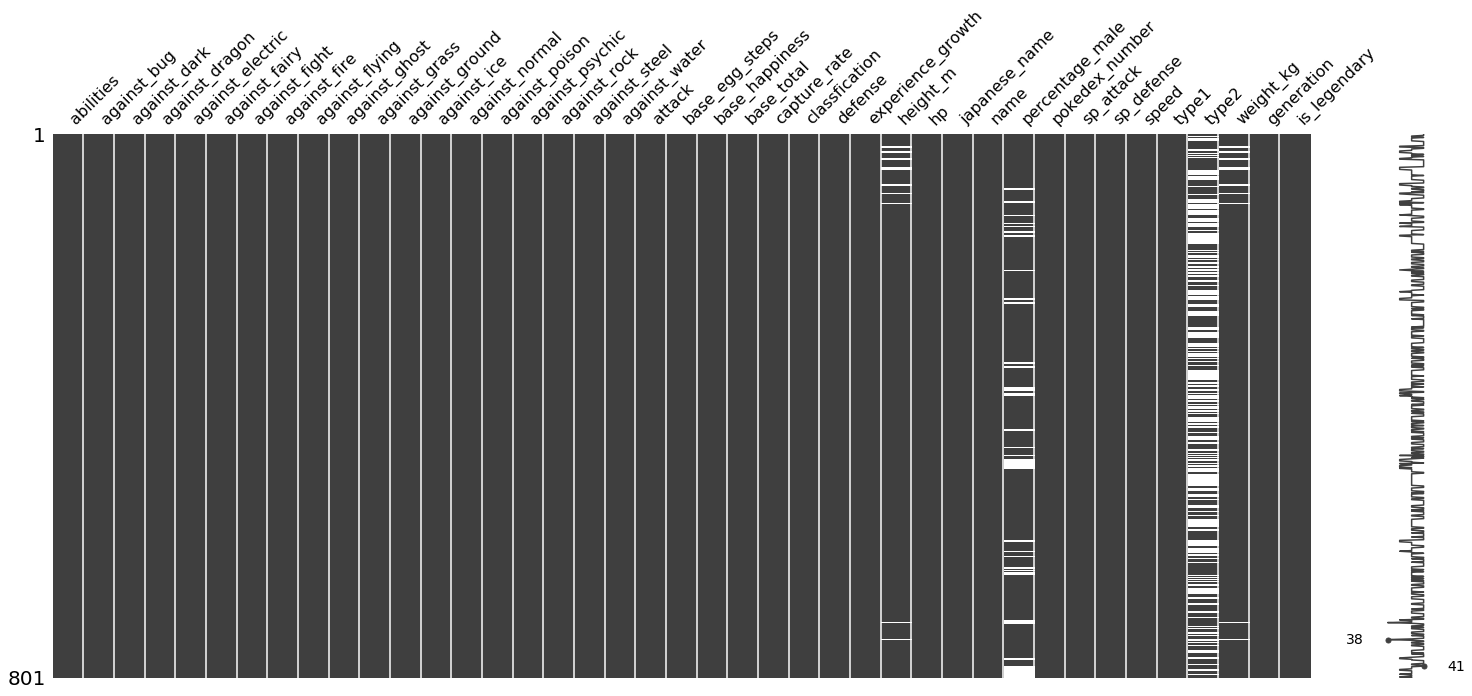

In [11]:
mn.matrix(df)
plt.show()

In [8]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [12]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [114]:
df.height_m.fillna(np.int(0),inplace=True)
df.weight_kg.fillna(np.int(0), inplace=True)
df.percentage_male.fillna(np.int(-1),inplace=True)
df.type2.fillna(' ',inplace=True)

In [67]:
print('Pokemons com maiores status: ')

print('HP: ', df.loc[df.hp.idxmax()]['name'])
print('Attack: ', df.loc[df.attack.idxmax()]['name'])
print('Defense: ', df.loc[df.defense.idxmax()]['name'])
print('Sp. Attack: ', df.loc[df.sp_attack.idxmax()]['name'])
print('Sp. Defense: ', df.loc[df.sp_defense.idxmax()]['name'])
print('Speed: ', df.loc[df.speed.idxmax()]['name'])

Pokemons com maiores status: 
HP:  Blissey
Attack:  Heracross
Defense:  Steelix
Sp. Attack:  Mewtwo
Sp. Defense:  Shuckle
Speed:  Deoxys


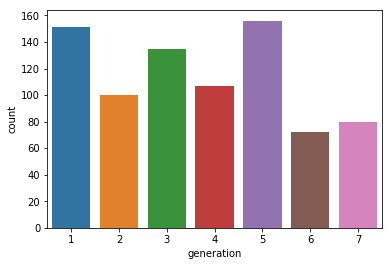

In [69]:
sns.countplot(df.generation)
plt.show()

In [86]:
df['total'] = df.hp + df.attack + df.defense + df.sp_attack + df.sp_defense + df.speed

In [87]:
df.sort_values(by='total', ascending=False).drop_duplicates(subset=['generation'],keep='first').sort_values(by='generation')[['name','generation']]

,name,generation
149,Mewtwo,1
247,Tyranitar,2
383,Rayquaza,3
492,Arceus,4
645,Kyurem,5
717,Zygarde,6
791,Lunala,7


In [101]:
df.sort_values(by='total', ascending=False).drop_duplicates(subset=['type1'], keep='first')[['name', 'type1', 'is_legendary']]

,name,type1,is_legendary
149,Mewtwo,psychic,1
383,Rayquaza,dragon,1
382,Groudon,ground,1
381,Kyogre,water,1
492,Arceus,normal,1
247,Tyranitar,rock,0
375,Metagross,steel,0
716,Yveltal,dark,1
715,Xerneas,fairy,1
249,Ho-Oh,fire,1


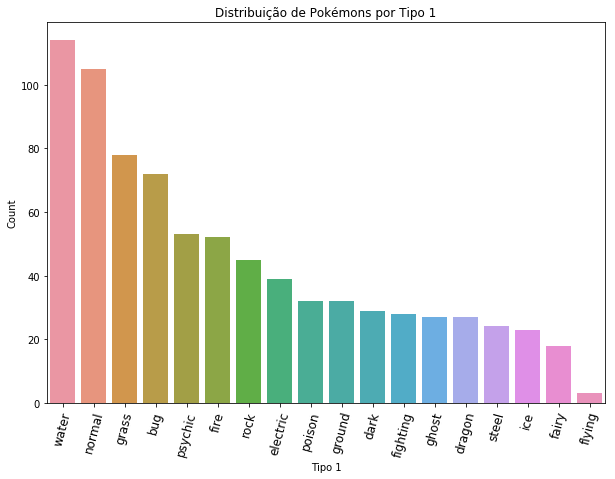

In [106]:
type1 = df.type1.value_counts()

plt.figure(figsize = (10,7))

ax = sns.barplot(x=type1.index, y=type1, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 1', ylabel='Count')
ax.set_title('Distribuição de Pokémons por Tipo 1')
plt.show()

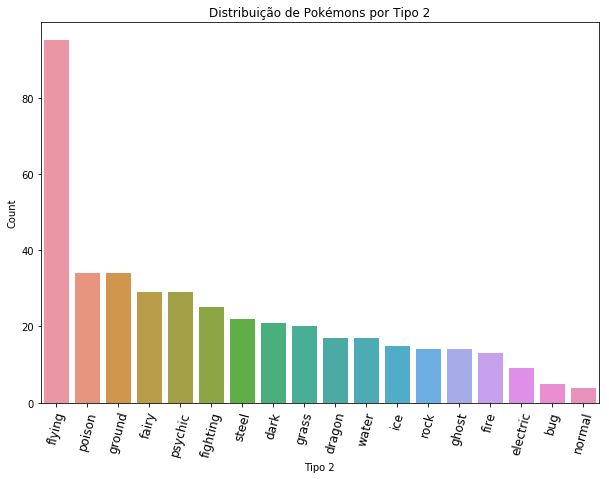

In [107]:
type2 = df.type2.value_counts()

plt.figure(figsize = (10,7))

ax = sns.barplot(x=type2.index, y=type2, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 2', ylabel='Count')
ax.set_title('Distribuição de Pokémons por Tipo 2')
plt.show()

In [123]:
df['comb_type'] = df.type1 + str(' ') + df.type2

In [136]:
df['comb_type'].value_counts().reset_index(name="count").query("count > 10")

,index,count
0,water,61
1,normal,61
2,grass,37
3,psychic,35
4,fire,27
5,normal flying,26
6,electric,26
7,fighting,22
8,bug,18
9,fairy,16


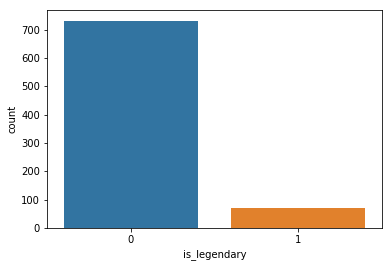

In [138]:
sns.countplot(df.is_legendary)
plt.show()

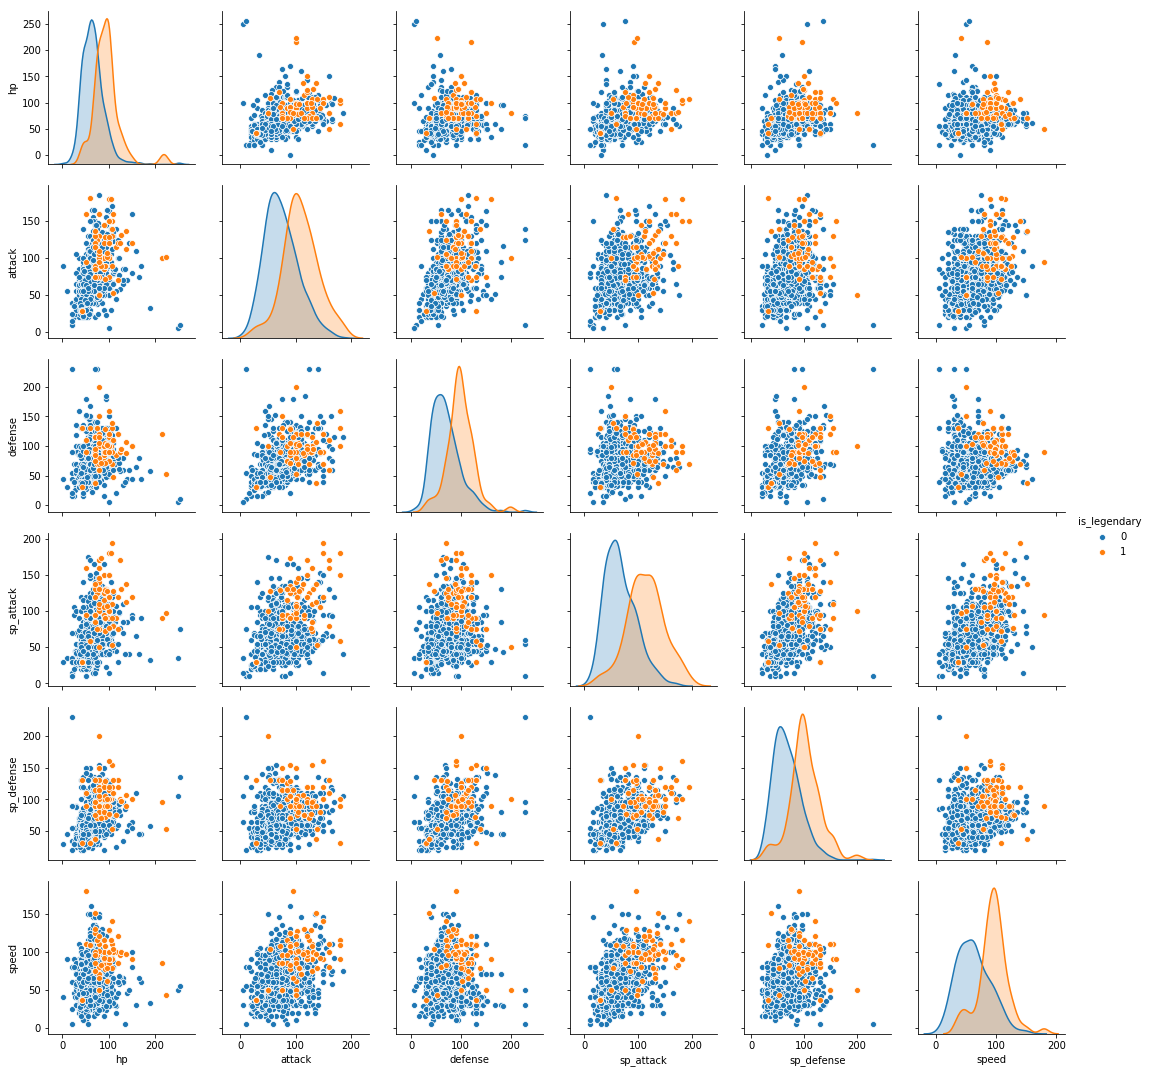

In [139]:
sns.pairplot(df, vars=['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'], hue='is_legendary')
plt.show()